In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

# Install necessary elements
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

from llama_index.llms.gemini import Gemini
from llama_index.embeddings.fireworks import FireworksEmbedding

from selenium.webdriver.chrome.options import Options
from lavague.core.retrievers import IxpathRetriever

chrome_options = Options()
chrome_options.add_experimental_option("debuggerAddress", "127.0.0.1:9222")

embed_model = FireworksEmbedding()
llm = Gemini(model_name="models/gemini-1.5-flash-latest")

from google.generativeai.types import HarmCategory, HarmBlockThreshold

llm._model._safety_settings={
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

# Set up our three key components: Driver, Action Engine, World Model
driver = SeleniumDriver(options=chrome_options)
action_engine = ActionEngine(driver, llm=llm, embedding=embed_model)

action_engine.navigation_engine.retriever = IxpathRetriever(driver)
action_engine.navigation_engine.retriever.top_k = 5

world_model = WorldModel()

# Create Web Agent
agent = WebAgent(world_model, action_engine)
# Set URL
agent.get("https://orcid.org/0000-0001-6102-7846")

/home/dhuynh95/LaVague/lavague-core/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
/home/dhuynh95/LaVague/lavague-core/lavague/core/utilities/version_checker.py:46: UserWarning: You are using lavague-core version 0.2.21, however version 0.2.22 is available. You should consider upgrading via the 'pip install --upgrade lavague-core' command.
  warnings.warn(
/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SessionNotCreatedException: Message: session not created: cannot connect to chrome at 127.0.0.1:9222
from unknown error: DevTools returned unknown type:shared_storage_worklet
Stacktrace:
#0 0x55de2e89cc7a <unknown>
#1 0x55de2e57fe2c <unknown>
#2 0x55de2e5923b0 <unknown>
#3 0x55de2e5927fc <unknown>
#4 0x55de2e56a54a <unknown>
#5 0x55de2e56a426 <unknown>
#6 0x55de2e5bac89 <unknown>
#7 0x55de2e5b09fc <unknown>
#8 0x55de2e5fbc49 <unknown>
#9 0x55de2e5ef363 <unknown>
#10 0x55de2e5bf247 <unknown>
#11 0x55de2e5bfb9e <unknown>
#12 0x55de2e86324b <unknown>
#13 0x55de2e8672f1 <unknown>
#14 0x55de2e84eafe <unknown>
#15 0x55de2e867e52 <unknown>
#16 0x55de2e83379f <unknown>
#17 0x55de2e88c638 <unknown>
#18 0x55de2e88c810 <unknown>
#19 0x55de2e89bdac <unknown>
#20 0x7f7ebfaa8ac3 <unknown>


## Error: driver.check_visibility

`driver.check_visibility(element)` always outputs `False`

In [2]:
from lavague.core.base_driver import BaseDriver

xpaths = list(driver.get_possible_interactions().keys())

def highlight_element(element, driver: BaseDriver):
    driver.execute_script(
        "arguments[0].setAttribute('style', arguments[1]);",
        element,
        "border: 2px solid red;",
    )

elements = []

for id, xpath in enumerate(xpaths):
    try:
        element = driver.resolve_xpath(xpath)
        if driver.check_visibility(element):
            
            elements.append(element)
            highlight_element(element, driver)
        else:
            print(f"Element {id} is not visible")
    except:
        pass
    
def add_id_overlays(driver, elements):
    js_script = """
    function addIdOverlay(element, id) {
        const rect = element.getBoundingClientRect();
        const overlay = document.createElement('div');
        overlay.textContent = id;
        overlay.style.position = 'absolute';
        overlay.style.backgroundColor = 'rgba(255, 0, 0, 0.7)';
        overlay.style.color = 'white';
        overlay.style.padding = '2px 5px';
        overlay.style.borderRadius = '3px';
        overlay.style.fontSize = '12px';
        overlay.style.zIndex = '10000';
        overlay.style.pointerEvents = 'none';  // Ensure it doesn't interfere with clicks
        
        // Position the overlay at the top-left corner, outside the element
        overlay.style.left = (rect.left - 25) + 'px';
        overlay.style.top = (rect.top - 25) + 'px';
        
        // Adjust position if too close to the left edge
        if (rect.left < 30) {
            overlay.style.left = rect.right + 'px';
        }
        
        // Adjust position if too close to the top edge
        if (rect.top < 30) {
            overlay.style.top = rect.bottom + 'px';
        }
        
        document.body.appendChild(overlay);
    }
    
    const elements = arguments[0];
    for (let i = 0; i < elements.length; i++) {
        addIdOverlay(elements[i], i);
    }
    """
    driver.execute_script(js_script, elements)
    
add_id_overlays(driver, elements)

Element 0 is not visible
Element 1 is not visible
Element 2 is not visible
Element 3 is not visible
Element 4 is not visible
Element 5 is not visible
Element 6 is not visible
Element 7 is not visible
Element 8 is not visible
Element 9 is not visible
Element 10 is not visible
Element 11 is not visible
Element 12 is not visible
Element 13 is not visible
Element 14 is not visible
Element 15 is not visible
Element 16 is not visible
Element 17 is not visible
Element 18 is not visible
Element 19 is not visible
Element 20 is not visible
Element 21 is not visible
Element 22 is not visible
Element 23 is not visible
Element 24 is not visible
Element 25 is not visible
Element 26 is not visible
Element 27 is not visible
Element 28 is not visible
Element 29 is not visible
Element 30 is not visible
Element 31 is not visible
Element 32 is not visible
Element 33 is not visible
Element 34 is not visible
Element 35 is not visible
Element 36 is not visible
Element 37 is not visible
Element 38 is not visi

## Error: driver.resolve_xpath

`driver.resolve_xpath(xpath)` outputs elements that are not found.

In [2]:
from lavague.core.base_driver import BaseDriver

def highlight_element(element, driver: BaseDriver):
    driver.execute_script(
        "arguments[0].setAttribute('style', arguments[1]);",
        element,
        "border: 2px solid red;",
    )

xpaths = driver.get_possible_interactions().keys()

from selenium.webdriver.common.by import By

elements = []

for id, xpath in enumerate(xpaths):
    try:
        element = driver.resolve_xpath(xpath)
        elements.append(element)
    except:
        continue
    highlight_element(element, driver)
    
def add_id_overlays(driver, elements):
    js_script = """
    function addIdOverlay(element, id) {
        const rect = element.getBoundingClientRect();
        const overlay = document.createElement('div');
        overlay.textContent = id;
        overlay.style.position = 'absolute';
        overlay.style.backgroundColor = 'rgba(255, 0, 0, 0.7)';
        overlay.style.color = 'white';
        overlay.style.padding = '2px 5px';
        overlay.style.borderRadius = '3px';
        overlay.style.fontSize = '12px';
        overlay.style.zIndex = '10000';
        overlay.style.pointerEvents = 'none';  // Ensure it doesn't interfere with clicks
        
        // Position the overlay at the top-left corner, outside the element
        overlay.style.left = (rect.left - 25) + 'px';
        overlay.style.top = (rect.top - 25) + 'px';
        
        // Adjust position if too close to the left edge
        if (rect.left < 30) {
            overlay.style.left = rect.right + 'px';
        }
        
        // Adjust position if too close to the top edge
        if (rect.top < 30) {
            overlay.style.top = rect.bottom + 'px';
        }
        
        document.body.appendChild(overlay);
    }
    
    const elements = arguments[0];
    for (let i = 0; i < elements.length; i++) {
        addIdOverlay(elements[i], i);
    }
    """
    driver.execute_script(js_script, elements)
    
add_id_overlays(driver, elements)

NoSuchElementException: Message: no such element: element not found
  (Session info: chrome=126.0.6478.126); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x55b5bdeaec7a <unknown>
#1 0x55b5bdb91e2c <unknown>
#2 0x55b5bdba2504 <unknown>
#3 0x55b5bdba2e6a <unknown>
#4 0x55b5bdb97f25 <unknown>
#5 0x55b5bdba2e9b <unknown>
#6 0x55b5bdb97f25 <unknown>
#7 0x55b5bdba2e9b <unknown>
#8 0x55b5bdb97f25 <unknown>
#9 0x55b5bdb96259 <unknown>
#10 0x55b5bdb995ac <unknown>
#11 0x55b5bdc212d9 <unknown>
#12 0x55b5bdc015c2 <unknown>
#13 0x55b5bdc20303 <unknown>
#14 0x55b5bdc01363 <unknown>
#15 0x55b5bdbd1247 <unknown>
#16 0x55b5bdbd1b9e <unknown>
#17 0x55b5bde7524b <unknown>
#18 0x55b5bde792f1 <unknown>
#19 0x55b5bde60afe <unknown>
#20 0x55b5bde79e52 <unknown>
#21 0x55b5bde4579f <unknown>
#22 0x55b5bde9e638 <unknown>
#23 0x55b5bde9e810 <unknown>
#24 0x55b5bdeaddac <unknown>
#25 0x7fa5cbec7ac3 <unknown>


# Hacky but working solution

In [7]:
def process_elements_with_highlights(driver):
    js_script = """
    function getElementsFromXPaths(xpaths) {
        return xpaths.map((xpath, index) => {
            try {
                const element = document.evaluate(
                    xpath, 
                    document, 
                    null, 
                    XPathResult.FIRST_ORDERED_NODE_TYPE, 
                    null
                ).singleNodeValue;
                if (element) {
                    highlightElement(element);
                    addIdOverlay(element, index);
                    return { element, xpath };
                }
            } catch (e) {
                console.error('Error processing XPath:', xpath, e);
            }
            return null;
        }).filter(item => item !== null);
    }

    function highlightElement(element) {
        element.setAttribute('data-original-style', element.getAttribute('style') || '');
        element.style.border = '2px solid red';
    }

    function addIdOverlay(element, id) {
        const rect = element.getBoundingClientRect();
        const overlay = document.createElement('div');
        overlay.textContent = id;
        overlay.className = 'selenium-id-overlay';
        overlay.style.position = 'absolute';
        overlay.style.backgroundColor = 'rgba(255, 0, 0, 0.7)';
        overlay.style.color = 'white';
        overlay.style.padding = '2px 5px';
        overlay.style.borderRadius = '3px';
        overlay.style.fontSize = '12px';
        overlay.style.zIndex = '10000';
        overlay.style.pointerEvents = 'none';
        
        overlay.style.left = (rect.left - 25) + 'px';
        overlay.style.top = (rect.top - 25) + 'px';
        
        if (rect.left < 30) {
            overlay.style.left = rect.right + 'px';
        }
        
        if (rect.top < 30) {
            overlay.style.top = rect.bottom + 'px';
        }
        
        document.body.appendChild(overlay);
    }

    const xpaths = arguments[0];
    return getElementsFromXPaths(xpaths);
    """
    
    xpaths = driver.get_possible_interactions().keys()
    result = driver.execute_script(js_script, list(xpaths))
    
    # Create id_to_xpath dictionary
    id_to_xpath = {i: item['xpath'] for i, item in enumerate(result)}
    
    return id_to_xpath

# # Usage
# id_to_xpath = process_elements_with_highlights(driver)
# print(id_to_xpath)

In [8]:
# def highlight_elements(driver, elements):
#     js_script = """
#     function highlightElement(element) {
#         element.setAttribute('data-original-style', element.getAttribute('style') || '');
#         element.style.border = '2px solid red';
#     }
    
#     const elements = arguments[0];
#     elements.forEach(highlightElement);
#     """
#     driver.execute_script(js_script, elements)



# def get_elements_from_xpaths(driver, xpaths):
#     js_script = """
#     function getElementsFromXPaths(xpaths) {
#         return xpaths.map(xpath => {
#             try {
#                 return document.evaluate(
#                     xpath, 
#                     document, 
#                     null, 
#                     XPathResult.FIRST_ORDERED_NODE_TYPE, 
#                     null
#                 ).singleNodeValue;
#             } catch (e) {
#                 return null;
#             }
#         }).filter(element => element !== null);
#     }
#     return getElementsFromXPaths(arguments[0]);
#     """
#     return driver.execute_script(js_script, list(xpaths))

# def add_id_overlays(driver, elements):
#     js_script = """
#     function addIdOverlay(element, id) {
#         const rect = element.getBoundingClientRect();
#         const overlay = document.createElement('div');
#         overlay.textContent = id;
#         overlay.className = 'selenium-id-overlay';  // Add a unique class
#         overlay.style.position = 'absolute';
#         overlay.style.backgroundColor = 'rgba(255, 0, 0, 0.7)';
#         overlay.style.color = 'white';
#         overlay.style.padding = '2px 5px';
#         overlay.style.borderRadius = '3px';
#         overlay.style.fontSize = '12px';
#         overlay.style.zIndex = '10000';
#         overlay.style.pointerEvents = 'none';
        
#         overlay.style.left = (rect.left - 25) + 'px';
#         overlay.style.top = (rect.top - 25) + 'px';
        
#         if (rect.left < 30) {
#             overlay.style.left = rect.right + 'px';
#         }
        
#         if (rect.top < 30) {
#             overlay.style.top = rect.bottom + 'px';
#         }
        
#         document.body.appendChild(overlay);
#     }
    
#     const elements = arguments[0];
#     for (let i = 0; i < elements.length; i++) {
#         addIdOverlay(elements[i], i);
#     }
#     """
#     driver.execute_script(js_script, elements)



# # Usage
# xpaths = driver.get_possible_interactions().keys()
# elements = get_elements_from_xpaths(driver, xpaths)
# highlight_elements(driver, elements)
# add_id_overlays(driver, elements)

In [9]:
def remove_highlights(driver):
    js_script = """
    function removeHighlight(element) {
        const originalStyle = element.getAttribute('data-original-style');
        if (originalStyle === null) {
            element.removeAttribute('style');
        } else {
            element.setAttribute('style', originalStyle);
        }
        element.removeAttribute('data-original-style');
    }
    
    const elements = document.querySelectorAll('[data-original-style]');
    elements.forEach(removeHighlight);
    """
    driver.execute_script(js_script)

def remove_id_overlays(driver):
    js_script = """
    const overlays = document.querySelectorAll('.selenium-id-overlay');
    overlays.forEach(overlay => {
        overlay.remove();
    });
    """
    driver.execute_script(js_script)

# remove_highlights(driver)
# remove_id_overlays(driver)

# Inference

In [10]:
PREVIOUS_EXAMPLES = """
Instruction: Click on Sign In / Register

Thoughts:
- The "Sign in / Register" button is located at the top right.
- The button is highlighted with the ID "37".
- There is no other element that matches the direction, therefore the most likely outcome is "37".
Output: 
- action:
    name: click
    args:
      id: 37
---
Instruction: Type 'What is love' in the search bar

Thoughts:
- Given the instruction, the most likely element to interact with is the search bar at the top with the ID "0".
- I will set the value of the search bar to "What is love".
Output: 
- action:
    name: click
    args:
      id: 0
      value: "What is love"
---
Instruction: In the contact form, fill out the "Name" field with "John Doe", the "Email" field with "john@example.com", and click the submit button
Thoughts:

- We need to identify multiple elements in a form and interact with them in sequence.
- The "Name" field is highlighted with ID "23".
- The "Email" field is highlighted with ID "24".
- The submit button is highlighted with ID "25".
- We'll need to perform multiple actions in the correct order.

Output:
- action:
    name: setValue
    args:
      id: 23
      value: "John Doe"
- action:
    name: setValue
    args:
      id: 24
      value: "john@example.com"
- action:
    name: click
    args:
      id: 25
"""

SOM_PROMPT_TEMPLATE = """
You are an AI assistant tasked with helping navigate web interfaces.
You are provided with screenshots with different elements already highlighted and their corresponding ID. 
Your goal is to output actions in YAML format that can be used to interact with the elements.
The actions available are:

Name: click
Description: Click on an element with a specific xpath
Arguments:
  - id (int)

Name: setValue
Description: Focus on and set the value of an input element with a specific xpath
Arguments:
  - id (int)
  - value (string)

Name: setValueAndEnter
Description: Like "setValue", except then it presses ENTER. Use this tool can submit the form when there's no "submit" button.
Arguments:
  - id (int)
  - value (string)

Your goal is to output in YAML 

- action:
    name: click
    args:
      id: "/html/body/section/devsite-header/div/div[1]/div/div/div[2]/div[1]/devsite-tabs/nav/tab[2]/a"
- action:
    name: click
    args:
      xpath: "/html/body/section/devsite-header/div/div[1]/div/div/div[2]/div[1]/devsite-tabs/nav/tab[2]/div/tab[1]/a"

Your output must be in the following format:
- Thoughts: explanation of the process to derive the output
- Action: the output action in YAML format

Here are previous examples:
{previous_examples}

Here is the current example to classify:

Instruction: {instruction}

Thoughts:
"""

In [11]:
from llama_index.core import PromptTemplate

prompt_template = PromptTemplate(SOM_PROMPT_TEMPLATE)
prompt_template = prompt_template.partial_format(
    previous_examples=PREVIOUS_EXAMPLES
)

In [12]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

mm_llm = GeminiMultiModal(model_name="models/gemini-1.5-pro-latest")

In [ ]:
from PIL.PngImagePlugin import PngImageFile
from lavague.core.base_driver import BaseDriver
from PIL import Image

def get_screenshot(driver: BaseDriver) -> PngImageFile: 
    """Returns the screenshot of the current page"""
    current_screenshot_folder = driver.get_current_screenshot_folder()
    screenshot_path = driver.save_screenshot(current_screenshot_folder)
    img = Image.open(screenshot_path)
    return img

def execute_action(driver: BaseDriver, action_list: str) -> PngImageFile:
    """Executes the action"""
    for item in action_list:
        action_name = item["action"]["name"]
        if action_name == "click":
            driver.click(item["action"]["args"]["xpath"])
        elif action_name == "setValue":
            driver.set_value(
                item["action"]["args"]["xpath"], item["action"]["args"]["value"]
            )
        elif action_name == "setValueAndEnter":
            driver.set_value(
                item["action"]["args"]["xpath"],
                item["action"]["args"]["value"],
                True,
            )
        elif action_name == "wait":
            driver.perform_wait(item["action"]["args"]["duration"])
            
    screenshot = get_screenshot(driver)
    return screenshot

In [ ]:
import yaml

def load_yaml_from_string(yaml_string):
    try:
        return yaml.safe_load(yaml_string)
    except yaml.YAMLError as e:
        print(f"Error loading YAML string: {e}")
        return None

screenshots/fa0df05c32b6f9a1bdda3daeca49b214/1b65c9ac28bd1c4d7eaf1de6d278e41b.png


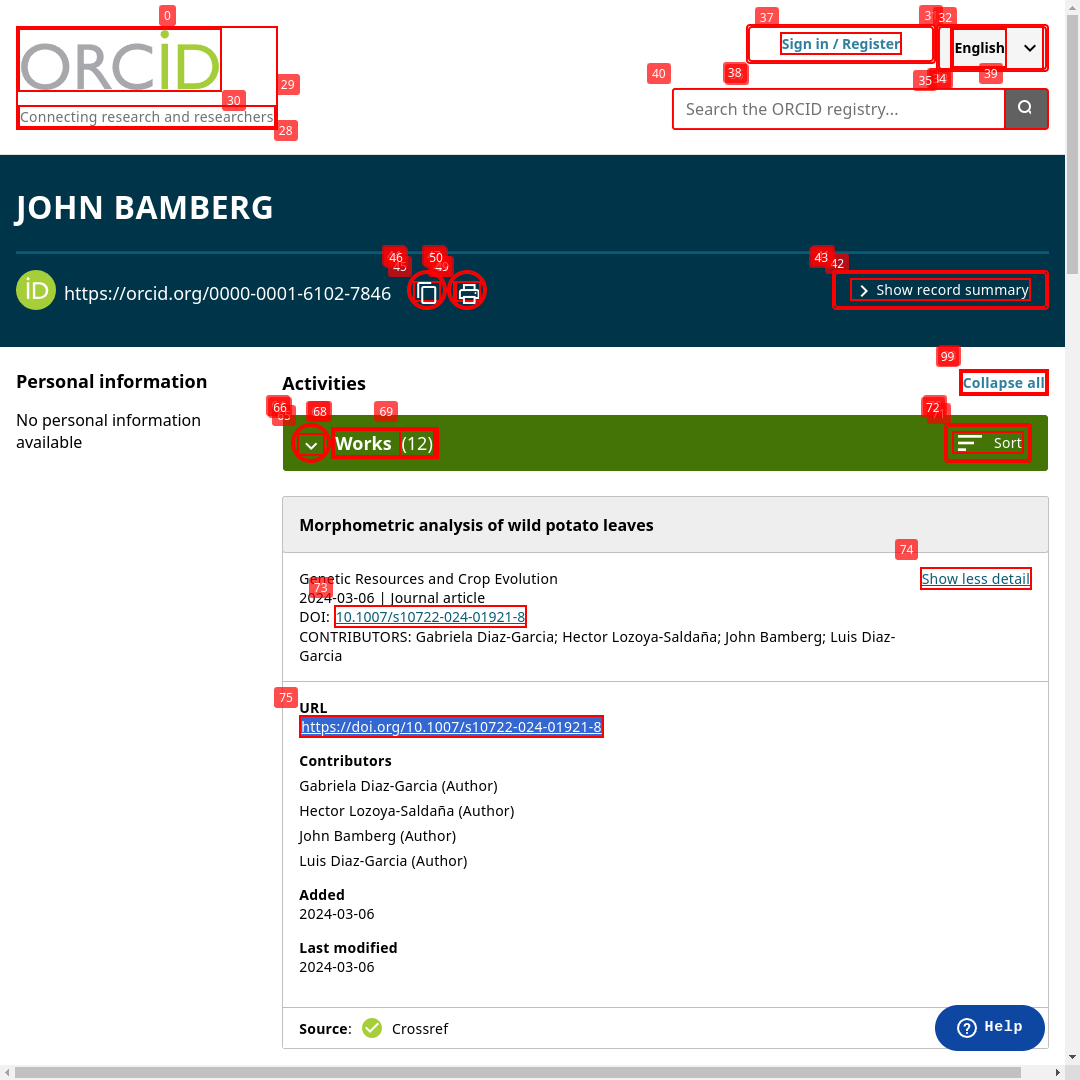

In [19]:
from llama_index.core import SimpleDirectoryReader

# instruction = "Click on 'Show more detail' next to 'Morphometric Analysis of wild potato leaves'"
instruction = "Click on 'https://doi.org/10.1007/s10722-024-01921-8'"

remove_highlights(driver)
remove_id_overlays(driver)

id_to_xpath = process_elements_with_highlights(driver)

current_screenshot_folder = driver.get_current_screenshot_folder()
screenshot_path = driver.save_screenshot(current_screenshot_folder)
print(screenshot_path)


screenshots_path = current_screenshot_folder
image_documents = SimpleDirectoryReader(screenshots_path).load_data()

prompt = prompt_template.format(instruction=instruction)
action = mm_llm.complete(prompt, image_documents=image_documents).text

yaml_string = action.split("Output:")[1].replace("```","").replace("yaml","")
action_list = load_yaml_from_string(yaml_string)

for action in action_list:
    action_args = action["action"]["args"]
    action_args["xpath"] = id_to_xpath[action_args["id"]]
    
execute_action(driver, action_list)

In [2]:
item = action_list[0]
item["action"]["args"]["xpath"]

NameError: name 'action_list' is not defined

In [64]:
# from lavague.core.som_navigation import SoMNavigationEngine

# som_navigation_engine = SoMNavigationEngine(driver)

# instruction = "Click on 'Show more detail' next to 'Morphometric Analysis of wild potato leaves'"

# action = som_navigation_engine.get_action(instruction=instruction)